In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('marketing_campaign.csv', sep=';')

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.shape

(2240, 29)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Check Missing Value

In [12]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

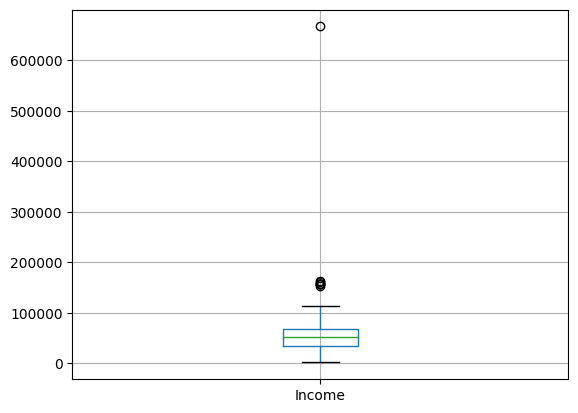

In [10]:
#Check Outliers
boxplot = df.boxplot(column=['Income'])

In [11]:
df['Income'].median()

51381.5

In [13]:
df['Income'].fillna(51390, inplace=True)

In [15]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [16]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [17]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [18]:
df=pd.get_dummies(df, columns = ['Education', 'Marital_Status'])

In [19]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,False,False,True,False,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,False,False,True,False,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,False,True,False,False,False,True,False,False,False,False


In [20]:
df_input=df[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
             'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
             'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
             'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
             'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
             'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
             'Education_2n Cycle', 'Education_Basic', 'Education_Graduation',
             'Education_Master', 'Education_PhD', 'Marital_Status_Divorced',
             'Marital_Status_Married', 'Marital_Status_Single',
             'Marital_Status_Together', 'Marital_Status_Widow']]

In [21]:
df_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   int64  
 2   Teenhome                 2240 non-null   int64  
 3   Recency                  2240 non-null   int64  
 4   MntWines                 2240 non-null   int64  
 5   MntFruits                2240 non-null   int64  
 6   MntMeatProducts          2240 non-null   int64  
 7   MntFishProducts          2240 non-null   int64  
 8   MntSweetProducts         2240 non-null   int64  
 9   MntGoldProds             2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

# **K-Means Clustering**

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

In [23]:
# Assuming df_input is your DataFrame containing the input data
distortions = []
best_n_clusters = None
best_silhouette_score = -1  # Initialize with a low value

K = range(2, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_labels = kmeanModel.fit_predict(df_input)

    # Calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(df_input, cluster_labels)

    print("For n_clusters =", k, "The average silhouette_score is:", silhouette_avg)

    # Save the best result
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_n_clusters = k

    # kmeans inertia_ attribute is: Sum of squared distances of samples
    # to their closest cluster center.
    distortions.append(kmeanModel.inertia_)

# Print the best result
print("The best number of clusters is:", best_n_clusters, "with silhouette score:", best_silhouette_score)


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is: 0.5944215067067281
For n_clusters = 3 The average silhouette_score is: 0.5984416346178375


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is: 0.5442851429541015
For n_clusters = 5 The average silhouette_score is: 0.5251029456103032


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is: 0.5351999704884863
For n_clusters = 7 The average silhouette_score is: 0.5422214547202476


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is: 0.5189387978419804
For n_clusters = 9 The average silhouette_score is: 0.5176898334938496
The best number of clusters is: 3 with silhouette score: 0.5984416346178375


c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [24]:
#Based on silhouette score and elbow method cluster 3 is the best one
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(df_input)

c:\Python\environments\deep_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [25]:
df['k_means']=kmeanModel.predict(df_input)

In [26]:
df['k_means'].value_counts()

k_means
0    1167
1    1072
2       1
Name: count, dtype: int64

In [27]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,k_means
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,False,False,False,False,False,True,False,False,False,1
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,False,False,False,False,False,True,False,False,False,0
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,False,False,False,False,False,False,True,False,False,1
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,False,False,False,False,False,False,True,False,False,0
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,True,False,False,False,True,False,False,False,False,1


In [28]:
df['k_means'].value_counts()

k_means
0    1167
1    1072
2       1
Name: count, dtype: int64

**Visualisasi K-Means**

In [29]:
#To Decide Optimal Result from PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(df_input)
print('variance coverage: ',pca.explained_variance_ratio_)


variance coverage:  [9.99811962e-01 1.31552761e-04 4.49416582e-05]


In [30]:
df_input

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,58138.0,0,0,58,635,88,546,172,88,88,...,False,False,True,False,False,False,False,True,False,False
1,46344.0,1,1,38,11,1,6,2,1,6,...,False,False,True,False,False,False,False,True,False,False
2,71613.0,0,0,26,426,49,127,111,21,42,...,False,False,True,False,False,False,False,False,True,False
3,26646.0,1,0,26,11,4,20,10,3,5,...,False,False,True,False,False,False,False,False,True,False
4,58293.0,1,0,94,173,43,118,46,27,15,...,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,46,709,43,182,42,118,247,...,False,False,True,False,False,False,True,False,False,False
2236,64014.0,2,1,56,406,0,30,0,0,8,...,False,False,False,False,True,False,False,False,True,False
2237,56981.0,0,0,91,908,48,217,32,12,24,...,False,False,True,False,False,True,False,False,False,False
2238,69245.0,0,1,8,428,30,214,80,30,61,...,False,False,False,True,False,False,False,False,True,False


In [31]:
new_data_transform_visual=pca.fit_transform(df_input)
new_data_transform_visual=pd.DataFrame(new_data_transform_visual,columns=['feat1','feat2','feat3'])

# Add the 'k_means' column to new_data_transform_visual
new_data_transform_visual['k_means'] = df['k_means']

In [32]:
new_data_transform_visual.head()

,feat1,feat2,feat3,k_means
0,5904.455520,-399.162949,243.971345,1
1,-5897.008656,280.719891,-40.171691,0
2,19374.884113,73.399052,-115.390799,1
3,-25594.042158,94.645108,19.025574,0
4,6053.391300,195.170271,-11.360360,1


In [33]:
new_data_transform_visual.shape

(2240, 4)

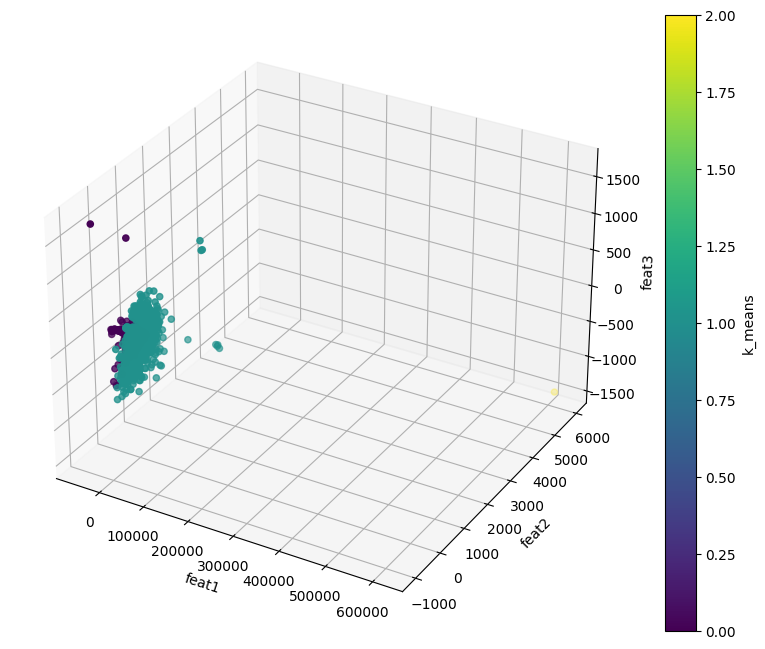

In [34]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(new_data_transform_visual['feat1'], new_data_transform_visual['feat2'], new_data_transform_visual['feat3'], c=df['k_means'], cmap='viridis')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('k_means')

# Set axis labels
ax.set_xlabel('feat1')
ax.set_ylabel('feat2')
ax.set_zlabel('feat3')

# Show the plot
plt.show()

# **DBSCAN**

In [37]:
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import DBSCAN

In [38]:
# Parameter grid untuk dicari
param_grid = {
    'eps': np.arange(1, 20, 1),         # Sesuaikan rentang sesuai kebutuhan
    'min_samples': np.arange(1, 10, 1)  # Sesuaikan rentang sesuai kebutuhan
}

best_score = -1
best_params = None

# Melakukan Grid Search
for params in ParameterGrid(param_grid):
    dbscan_model = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan_model.fit_predict(df_input)

    # Hanya hitung Silhouette Score jika terdapat lebih dari satu label
    unique_labels = np.unique(labels)
    if len(unique_labels) > 1:
        # Silhouette Score sebagai metrik evaluasi
        score = silhouette_score(df_input, labels)

        # Memperbarui parameter terbaik jika mendapatkan skor yang lebih baik
        if score > best_score:
            best_score = score
            best_params = params

print("Parameter Terbaik:")
print("eps:", best_params['eps'])
print("min_samples:", best_params['min_samples'])
print("Silhouette Score:", best_score)

Parameter Terbaik:
eps: 19
min_samples: 1
Silhouette Score: 0.18248060001893895


In [39]:
# Melakukan clustering dengan DBSCAN
dbscan_model = DBSCAN(eps=19, min_samples=1)  # Sesuaikan nilai eps dan min_samples sesuai kebutuhan
df['DBSCAN'] = dbscan_model.fit_predict(df_input)

In [40]:
unique_value_count = df['DBSCAN'].nunique()
print("Number of unique values in 'DBSCAN' column:", unique_value_count)

Number of unique values in 'DBSCAN' column: 2023


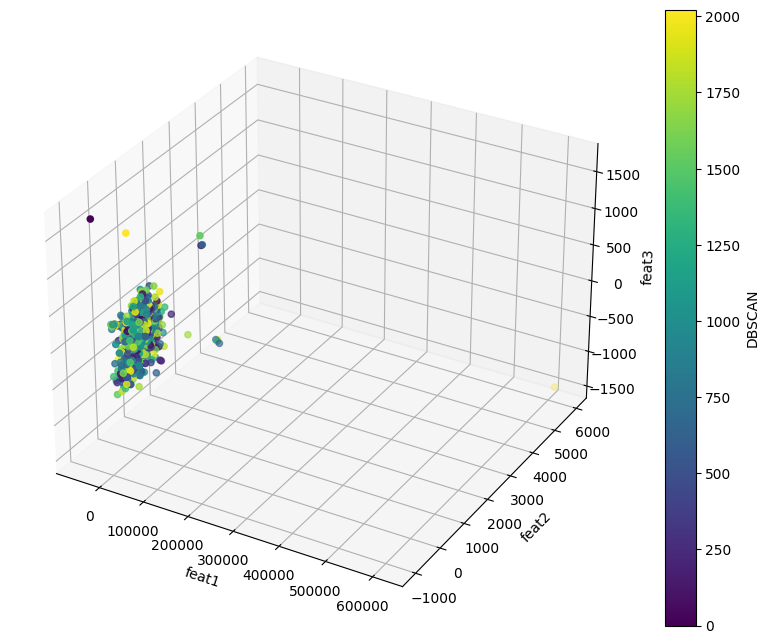

In [41]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(new_data_transform_visual['feat1'], new_data_transform_visual['feat2'], new_data_transform_visual['feat3'], c=df['DBSCAN'], cmap='viridis')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('DBSCAN')

# Set axis labels
ax.set_xlabel('feat1')
ax.set_ylabel('feat2')
ax.set_zlabel('feat3')

# Show the plot
plt.show()

In [42]:
# Add the 'k_means' column to new_data_transform_visual
new_data_transform_visual['DBSCAN'] = df['DBSCAN']
new_data_transform_visual

,feat1,feat2,feat3,k_means,DBSCAN
0,5904.455520,-399.162949,243.971345,1,0
1,-5897.008656,280.719891,-40.171691,0,1
2,19374.884113,73.399052,-115.390799,1,2
3,-25594.042158,94.645108,19.025574,0,3
4,6053.391300,195.170271,-11.360360,1,4
...,...,...,...,...,...
2235,8987.968258,-315.450261,-136.392752,1,2019
2236,11775.386386,65.379986,-198.278076,1,1388
2237,4747.652354,-537.412279,-178.470793,1,2020
2238,17007.435903,20.758265,-33.943824,1,2021


# **Hierarchical Clustering**

In [44]:
from sklearn.cluster import AgglomerativeClustering

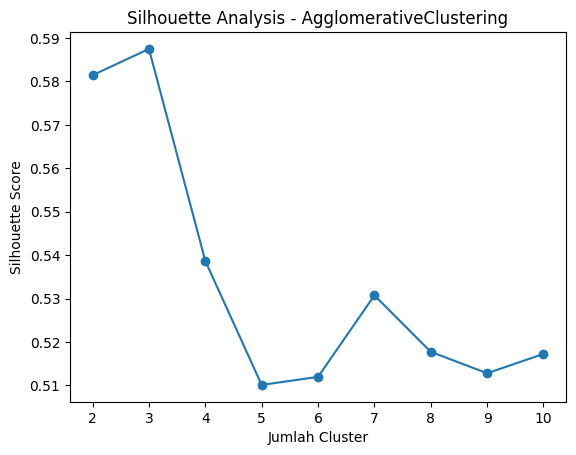

Jumlah Cluster Terbaik (Silhouette): 3


In [45]:
# Silhouette Analysis: Menghitung skor silhouette untuk jumlah klaster yang berbeda
silhouette_scores = []
for n_clusters in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglomerative.fit_predict(df_input)
    silhouette_avg = silhouette_score(df_input, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis - AgglomerativeClustering')
plt.show()

# Menemukan jumlah cluster terbaik berdasarkan skor silhouette
best_cluster_index = np.argmax(silhouette_scores)
best_cluster_count = best_cluster_index + 2  # Karena iterasi dimulai dari 2

print(f"Jumlah Cluster Terbaik (Silhouette): {best_cluster_count}")


In [46]:
# Melakukan hierarchical clustering dengan AgglomerativeClustering
agglomerative_model = AgglomerativeClustering(n_clusters=3)  # Sesuaikan parameter sesuai kebutuhan
df['Hierarchical'] = agglomerative_model.fit_predict(df_input)

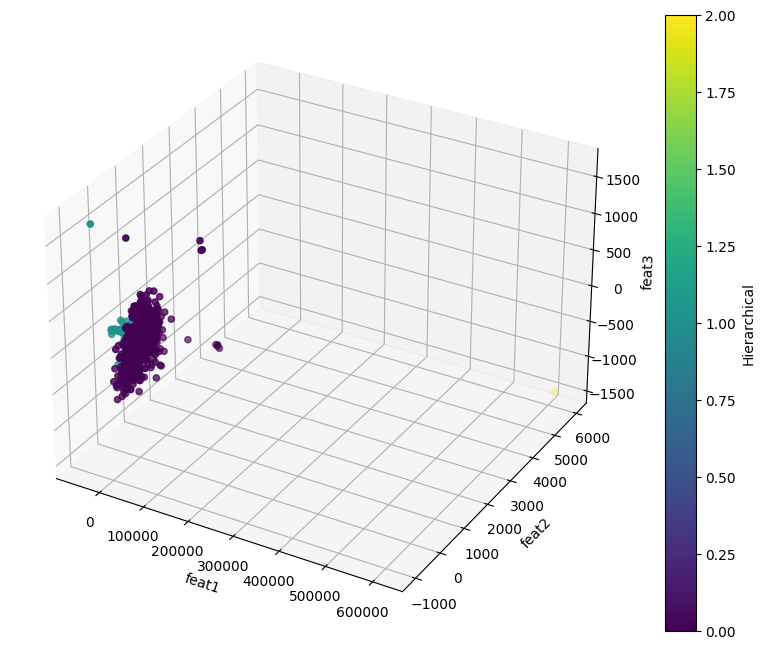

In [47]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on 'k_means' column
scatter = ax.scatter(new_data_transform_visual['feat1'], new_data_transform_visual['feat2'], new_data_transform_visual['feat3'], c=df['Hierarchical'], cmap='viridis')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax)
color_bar.set_label('Hierarchical')

# Set axis labels
ax.set_xlabel('feat1')
ax.set_ylabel('feat2')
ax.set_zlabel('feat3')

# Show the plot
plt.show()

In [48]:
# Add the 'k_means' column to new_data_transform_visual
new_data_transform_visual['Hierarchical'] = df['Hierarchical']
new_data_transform_visual

,feat1,feat2,feat3,k_means,DBSCAN,Hierarchical
0,5904.455520,-399.162949,243.971345,1,0,0
1,-5897.008656,280.719891,-40.171691,0,1,1
2,19374.884113,73.399052,-115.390799,1,2,0
3,-25594.042158,94.645108,19.025574,0,3,1
4,6053.391300,195.170271,-11.360360,1,4,0
...,...,...,...,...,...,...
2235,8987.968258,-315.450261,-136.392752,1,2019,0
2236,11775.386386,65.379986,-198.278076,1,1388,0
2237,4747.652354,-537.412279,-178.470793,1,2020,0
2238,17007.435903,20.758265,-33.943824,1,2021,0
